**Problem: Lead Scoring Model**

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.


Here you have a dataset of leads with their set of features and their status. 

You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. 

This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.
NOTE: The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.
NOTE: Treat all columns as CATEGORICAL columns
NOTE: 
This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.
Steps should be:
1.	Data Cleaning ( including Feature Selection)
2.	Training ( on Y percent of data)
3.	Testing ( on (100-Y) percent of data)
4.	Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.


https://docs.google.com/spreadsheets/d/1rK1CLqpsd6JfSBLk9nRE-f0NzDc9lEXgxZ-cKjxIN_s/edit?usp=sharing




In [1]:
## Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data = pd.read_excel('Data_Science_Internship.xlsx')
data.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


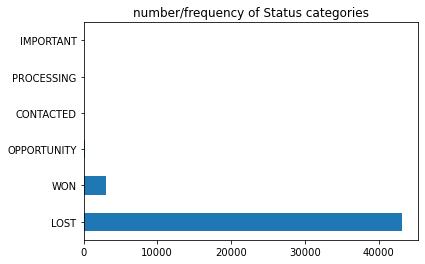

In [3]:
plt.title('number/frequency of Status categories')
(data['status'].value_counts()).plot(kind='barh')
plt.show()

In [4]:
## Select data with 'Lost' & 'WON' status only
df=data[data.status.isin(['LOST', 'WON'])].iloc[:,1:]
df.shape

(46317, 15)

In [5]:
## Frequency of status data
df.status.value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [6]:
df.head(2)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...


In [7]:
## Seeting value "9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0" as null.
df=df.applymap(lambda x: np.nan if x == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' else x)
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [8]:
## Checking Duplicate values
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
7604,96ab6152cb421b4d4012a4903c19004608a342a5f7c667...,WON,NaN,0-150,51.0,2022-09-10,226912ab42a1c1a4ff34aec12dcc58df1865371d40213f...,NaN,NaN,44574c4ba2ea74ad4bf1e184133cdbf4e7390a3690beff...,NaN,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,578346e055c3a47dbf5d16afc9f2496efb30e0d15aa799...
11383,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,NaN,2022-08-08,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb4...,NaN,NaN,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,79f45ffcab6477ac462e7479564f3ce36f698316ba2372...,0fa4720e8f52f127b3eb09a73a2dc682a95eee72b5d2a9...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,355713b625fd46c7f8575307f87cc4d77f22695d0026d5...
14338,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,150.0,51.0,2022-09-01,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d3...,NaN,NaN,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,53f80da4f1f3ea38acb886dcb770b60dc8a7241b3e6810...,NaN,NaN,NaN,d891a767b46652f2a86e2212c0ff5fa4f62d6a1664e361...
23688,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,120.0,51.0,2022-09-14,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb4...,NaN,NaN,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,3409d5d4bbb1e8b4c80ab0d47bb1f70ce475cfb3cd118c...,5e02dadaa7e4cd29809e2f8a115f1e5e9c01b29813a1fb...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,41e6c74985e2554aece9f841f8515b46182a02d8264390...
34306,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,0.0,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...,5e02dadaa7e4cd29809e2f8a115f1e5e9c01b29813a1fb...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,4789356dfa2cab509afd747aacedd81425d18930e35a7a...
37457,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,NaN,2022-08-23,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb4...,NaN,NaN,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,efbfd394ac2dc6f05e74e167113f414b0fa50b64f82dfb...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,4e4b409eaf076537510afbe2a56258304dc9473274d0df...
44564,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,0.0,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...,a3a90dcfa0abf041f3e54b0dcc83fc052023cbe1f7c87a...,02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e927379...,NaN,0a406b69cdc3655b07d9feaff8636e1c86f85a2913f857...
44573,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,0.0,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...,a3a90dcfa0abf041f3e54b0dcc83fc052023cbe1f7c87a...,02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e927379...,NaN,f93c3352922f54ed4bb8940a8071fa54943ebbae73a21e...
44574,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,0.0,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...,a3a90dcfa0abf041f3e54b0dcc83fc052023cbe1f7c87a...,02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e927379...,NaN,440841e55127448934982056f1b92ea2402157df277949...
44583,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,0.0,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...,a3a90dcfa0abf041f3e54b0dcc83fc052023cbe1f7c87a...,02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e927379...,NaN,abf39651acfbf4b5770ea02735e535c56fd36d5d1fefbd...


In [9]:
# dropping duplicates from the data.
df.drop_duplicates(inplace=True)

In [10]:
print(df.shape)
pd.DataFrame([df.isnull().sum(), 100*(df.isnull().sum()/df.shape[0])])   ##count & percentage of missining values in the data.

(46307, 15)


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0.0,0.0,3072.000000,3687.000000,2334.000000,13605.000000,5946.000000,8821.000000,8612.00000,61.00000,3183.000000,2528.000000,2528.000000,23481.000000,0.0
1,0.0,0.0,6.633986,7.962079,5.040275,29.380007,12.840391,19.048956,18.59762,0.13173,6.873691,5.459218,5.459218,50.707236,0.0


In [11]:
# df.replace(np.nan,' ', inplace=True)
df.fillna(method='bfill',inplace=True) ## Treating missing values by using Backfill method

In [12]:
df.isnull().sum()

Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
room_type         0
lead_id           0
dtype: int64

In [13]:
print(df.shape)
pd.DataFrame([df.isnull().sum(), 100*(df.isnull().sum()/df.shape[0])])   ##count & percentage of missining values in the data.

(46307, 15)


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


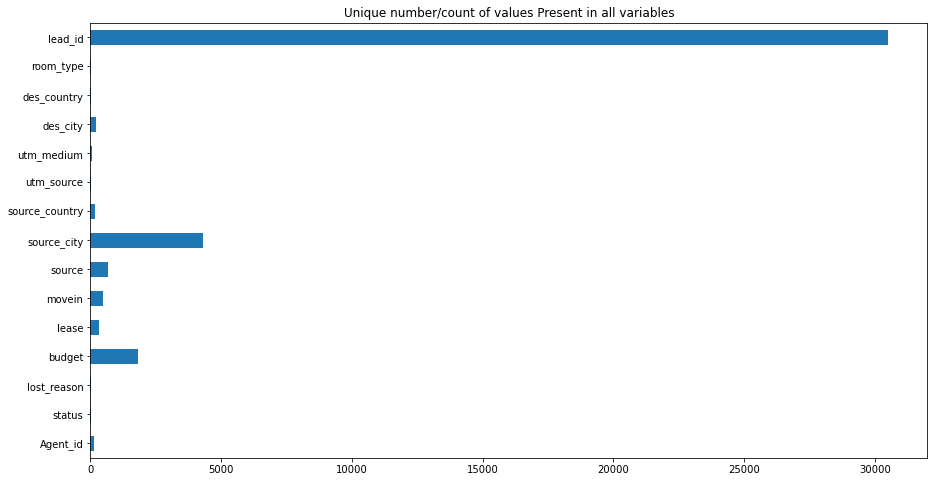

In [14]:
plt.title('Unique number/count of values Present in all variables')
df.nunique().plot(kind='barh', figsize=(15,8))
plt.show()

In [15]:
## Converting alphanumeric datatype to string
df=df.applymap(lambda x: str(x))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46307 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46307 non-null  object
 1   status          46307 non-null  object
 2   lost_reason     46307 non-null  object
 3   budget          46307 non-null  object
 4   lease           46307 non-null  object
 5   movein          46307 non-null  object
 6   source          46307 non-null  object
 7   source_city     46307 non-null  object
 8   source_country  46307 non-null  object
 9   utm_source      46307 non-null  object
 10  utm_medium      46307 non-null  object
 11  des_city        46307 non-null  object
 12  des_country     46307 non-null  object
 13  room_type       46307 non-null  object
 14  lead_id         46307 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


In [17]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True,square=True,cmap='Set2')

In [18]:
## Selecting columns
cat_cols=df.iloc[:,1:14].drop('movein',axis=1).columns

In [19]:
cat_cols

Index(['status', 'lost_reason', 'budget', 'lease', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country',
       'room_type'],
      dtype='object')

In [20]:
## Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])
df.to_excel('encoded_data.xlsx', index=False)

In [21]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,...,budget_encoded,lease_encoded,source_encoded,source_city_encoded,source_country_encoded,utm_source_encoded,utm_medium_encoded,des_city_encoded,des_country_encoded,room_type_encoded
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,...,1749,266,343,2619,165,5,10,205,8,0
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,...,1749,266,343,2619,165,5,10,74,8,0
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,...,1749,266,343,2619,165,25,3,18,8,0
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,2022-09-08 00:00:00,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,...,10,2,507,2817,165,25,3,26,8,1
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,120.0,semester-stay,2022-09-08 00:00:00,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,...,847,306,349,2103,100,5,10,210,8,1


In [22]:
df.iloc[:,15:].status_encoded.value_counts()/df.shape[0]

0    0.93366
1    0.06634
Name: status_encoded, dtype: float64

In [23]:
clean_data=df.iloc[:,15:]   ## Extracting Encoded data only
clean_data.head(2)

,status_encoded,lost_reason_encoded,budget_encoded,lease_encoded,source_encoded,source_city_encoded,source_country_encoded,utm_source_encoded,utm_medium_encoded,des_city_encoded,des_country_encoded,room_type_encoded
0,0,21,1749,266,343,2619,165,5,10,205,8,0
1,0,16,1749,266,343,2619,165,5,10,74,8,0


#### Data Assessment

In [24]:
## Checking Multicollinearity presence within the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = clean_data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(clean_data.values, i)
                          for i in range(len(clean_data.columns))]
  
print(vif_data)

                   feature        VIF
0           status_encoded   1.078224
1      lost_reason_encoded   9.598062
2           budget_encoded  -0.067321
3            lease_encoded  -7.058717
4           source_encoded  -1.936649
5      source_city_encoded   0.013577
6   source_country_encoded   9.279381
7       utm_source_encoded  11.909298
8       utm_medium_encoded   1.524074
9         des_city_encoded   3.961185
10     des_country_encoded  30.324034
11       room_type_encoded   1.626297


In [25]:
## Normalize the data by using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(clean_data.drop('status_encoded',axis=1))
scaled_df = pd.DataFrame(data_rescaled,columns=clean_data.drop('status_encoded',axis=1).columns)
scaled_df.head()

,lost_reason_encoded,budget_encoded,lease_encoded,source_encoded,source_city_encoded,source_country_encoded,utm_source_encoded,utm_medium_encoded,des_city_encoded,des_country_encoded,room_type_encoded
0,0.511993,0.741642,0.532433,-0.256671,0.275174,0.669584,-2.613303,0.143560,1.338621,0.123794,-0.793858
1,-0.332990,0.741642,0.532433,-0.256671,0.275174,0.669584,-2.613303,0.143560,-0.609338,0.123794,-0.793858
2,0.511993,0.741642,0.532433,-0.256671,0.275174,0.669584,0.421757,-0.430158,-1.442054,0.123794,-0.793858
3,-0.332990,-1.922921,-1.992802,1.069932,0.437902,0.669584,0.421757,-0.430158,-1.323094,0.123794,-0.015728
4,-1.684961,-0.640437,0.915045,-0.208137,-0.148906,-0.723326,-2.613303,0.143560,1.412970,0.123794,-0.015728


**Feature Selection**

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# separate features and target variable
X = scaled_df
y = clean_data['status_encoded']

# perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# get selected feature indices
selected_features = selector.get_support(indices=True)

# print selected feature names
print(X.columns[selected_features])

Index(['budget_encoded', 'source_encoded', 'source_country_encoded',
       'utm_medium_encoded', 'des_country_encoded'],
      dtype='object')


In [27]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit1 = test.fit(X,y)
# summarize scores
set_printoptions(precision=3)
print(fit1.scores_)
features = fit1.transform(X)
# summarize selected features
features
print(features[0:13,:])

[3.013e-01 1.600e+01 1.747e+00 5.203e+01 4.772e+00 5.032e+01 1.030e+00
 8.112e+01 1.268e+01 5.048e+01 5.081e-03]
[[-0.257  0.67   0.144  0.124]
 [-0.257  0.67   0.144  0.124]
 [-0.257  0.67  -0.43   0.124]
 [ 1.07   0.67  -0.43   0.124]
 [-0.208 -0.723  0.144  0.124]
 [-0.208 -0.723 -0.43   0.124]
 [ 0.463  0.67  -0.43   0.124]
 [-0.257  0.67  -0.43   0.124]
 [ 0.018 -0.723 -0.43   0.124]
 [ 0.463  0.627 -0.43   0.124]
 [-0.208  0.67  -0.43   0.124]
 [-0.257  0.67  -0.43   0.124]
 [-0.257  0.67  -0.43   0.124]]


In [28]:
# 0,2,3,5,7,9

<AxesSubplot:>

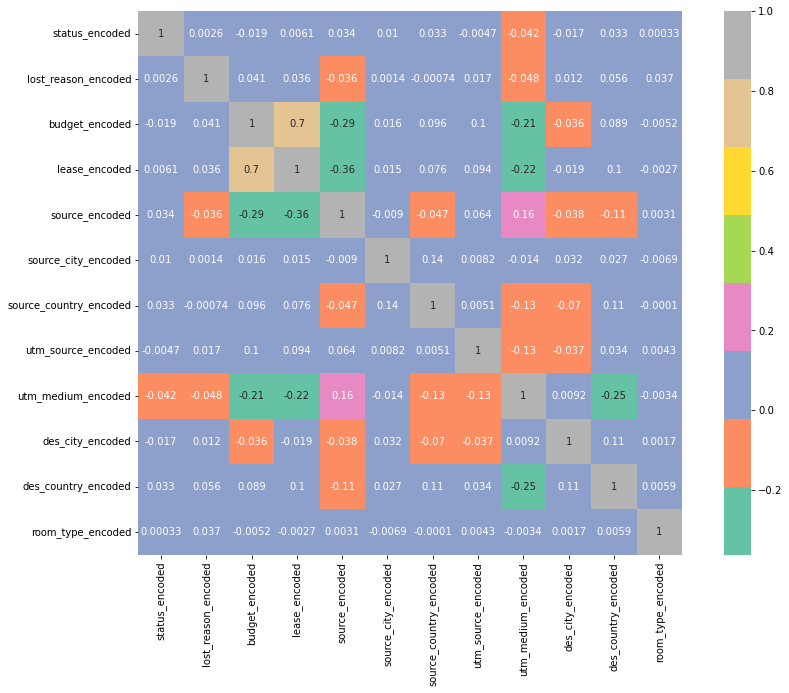

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(clean_data.corr(),annot=True,square=True,cmap='Set2')   ## Correlation test

#### Model Building

In [30]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,accuracy_score,roc_curve, auc
from sklearn.model_selection import cross_val_score


In [31]:
## Data Partition (70-30) to train and test, and defining CV 
X_train,X_test,y_train,y_test = train_test_split(X.iloc[:,[1,3,5,7,9]],y,test_size = 0.3,random_state=42)
print(X_train.shape,X_test.shape)
cv = KFold(n_splits=10, random_state=10, shuffle=True)

(32414, 5) (13893, 5)


**Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DecisionTreeClassifier model
# model = DecisionTreeClassifier()
# create instance of RandomForestClassifier model with class weights
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier()

In [33]:
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Train set score:{:.3f}".format(model.score(X_train,y_train)))
print("Test set score:{:.3f}".format(model.score(X_test,y_test)))

rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred)
aucrf=auc(rf_fpr,rf_tpr)
print(aucrf)
print(threshold)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13010
           1       0.28      0.08      0.13       883

    accuracy                           0.93     13893
   macro avg       0.61      0.53      0.54     13893
weighted avg       0.90      0.93      0.91     13893

[[12831   179]
 [  812    71]]
Train set score:0.956
Test set score:0.929
0.5333245269123934
[2 1 0]


**Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
# Predicting decision tree classifer model
y_preddec = dec.predict(X_test)
# Printing Accuracy score of Decision tree classifier model
print("Training set score:{:.3f}".format(dec.score(X_train,y_train)))
print("Test set score:{:.3f}".format(dec.score(X_test,y_test)))

print(classification_report(y_test,y_preddec))
## True Positive rate, False positive rate and AUC of Decision Tree classifier model
dec_fpr,dec_tpr,threshold=roc_curve(y_test,y_preddec)
auc_dec=auc(dec_fpr,dec_tpr)
print('auc', auc_dec)
## Cross validation score of Decision Tree Classifier model
SVCCV = (cross_val_score(dec, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

Training set score:0.956
Test set score:0.921
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13010
           1       0.23      0.11      0.14       883

    accuracy                           0.92     13893
   macro avg       0.59      0.54      0.55     13893
weighted avg       0.90      0.92      0.91     13893

auc 0.5406321733521474
0.9183685814520579


**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression().fit(X_train,y_train.values)
print(lm.intercept_,lm.coef_)



[-2.676] [[-0.061  0.161  0.113 -0.216  0.222]]


In [36]:
print("Training set score:{:.3f}".format(lm.score(X_train,y_train)))
print("Test set score:{:.3f}".format(lm.score(X_test,y_test)))

Training set score:0.932
Test set score:0.936


In [37]:
## True Positive rate, False positive rate and AUC of logistic model
y_predlog= lm.predict(X_test)
print(classification_report(y_test,y_pred))

log_fpr,log_tpr,threshold=roc_curve(y_test,y_predlog)
auc_log=auc(log_fpr,log_tpr)
print(auc_log)
## Cross validation score of logistic regression model.
SVCCV = (cross_val_score(lm, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13010
           1       0.28      0.08      0.13       883

    accuracy                           0.93     13893
   macro avg       0.61      0.53      0.54     13893
weighted avg       0.90      0.93      0.91     13893

0.5
0.9324674450825816


**KNN Classifier**

k=1 90.02 (+/- 1.52)
k=2 92.97 (+/- 0.37)
k=3 92.51 (+/- 0.40)
k=4 93.02 (+/- 0.39)
k=5 92.78 (+/- 0.43)
k=6 93.18 (+/- 0.42)
k=7 93.09 (+/- 0.43)
k=8 93.20 (+/- 0.44)
k=9 93.12 (+/- 0.42)
k=10 93.19 (+/- 0.45)
k=11 93.14 (+/- 0.45)
k=12 93.22 (+/- 0.48)
k=13 93.16 (+/- 0.46)
k=14 93.21 (+/- 0.45)
k=15 93.20 (+/- 0.44)
k=16 93.26 (+/- 0.42)
k=17 93.25 (+/- 0.43)
k=18 93.25 (+/- 0.41)
k=19 93.24 (+/- 0.42)
k=20 93.24 (+/- 0.42)
k=21 93.24 (+/- 0.43)
k=22 93.24 (+/- 0.40)
k=23 93.24 (+/- 0.41)
k=24 93.25 (+/- 0.42)
k=25 93.25 (+/- 0.42)
The optimal number of neighbors is 15 with 93.3%


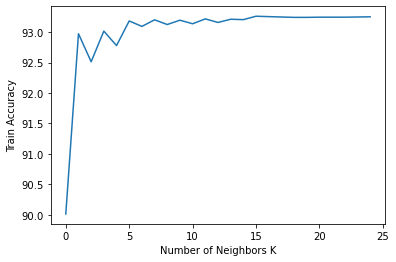

In [38]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = KFold(n_splits=10, random_state=123,shuffle=True)
    scores =cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(classification_report(y_test,knnpred))
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
knn_fpr,knn_tpr,threshold=roc_curve(y_test,knnpred)
auc_knn=auc(knn_fpr,knn_tpr)
print(auc_knn)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
KNNCV

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13010
           1       0.43      0.02      0.03       883

    accuracy                           0.94     13893
   macro avg       0.68      0.51      0.50     13893
weighted avg       0.91      0.94      0.91     13893

[[12989    21]
 [  867    16]]
94.0
0.5082529511665824


0.9319738654625793

**ROC-AUC Curve**

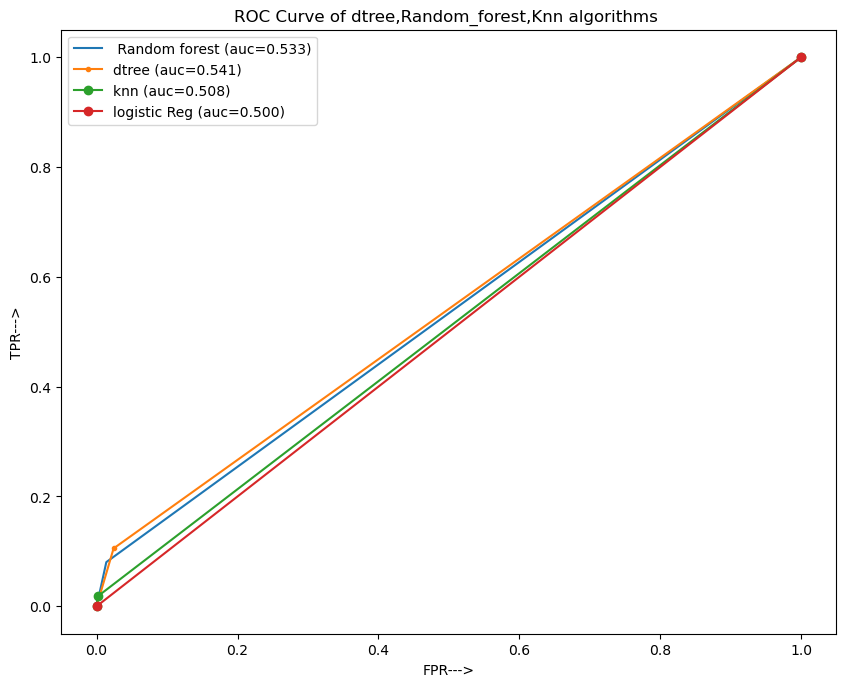

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(rf_fpr,rf_tpr,linestyle="-",label=' Random forest (auc=%0.3f)' %aucrf)
plt.plot(dec_fpr,dec_tpr,marker='.',label='dtree (auc=%0.3f)' %auc_dec)
plt.plot(knn_fpr,knn_tpr,marker='o',label='knn (auc=%0.3f)' %auc_knn)
plt.plot(log_fpr,log_tpr,marker='o',label='logistic Reg (auc=%0.3f)' %auc_log)

plt.xlabel('FPR--->')
plt.ylabel('TPR--->')
plt.title("ROC Curve of dtree,Random_forest,Knn algorithms ")
plt.legend()
plt.show()
plt.savefig('ROC Curve(different algorithms).png')

    - Decision Tree and Random forest Seems Good Fit as per the accuracy, F1-score and AUC
\

\
**Decision Tree Probability Score**


In [41]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id', 'status_encoded',
       'lost_reason_encoded', 'budget_encoded', 'lease_encoded',
       'source_encoded', 'source_city_encoded', 'source_country_encoded',
       'utm_source_encoded', 'utm_medium_encoded', 'des_city_encoded',
       'des_country_encoded', 'room_type_encoded'],
      dtype='object')

In [42]:
decprob=pd.DataFrame(dec.predict_proba(X.iloc[:,[1,3,5,7,9]]), columns=['LOST_prob','WON_prob'])

In [43]:
decprob.isnull().sum()

LOST_prob    0
WON_prob     0
dtype: int64

In [44]:
print(X.shape)
print(df.shape)
df.columns

(46307, 11)
(46307, 27)


Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id', 'status_encoded',
       'lost_reason_encoded', 'budget_encoded', 'lease_encoded',
       'source_encoded', 'source_city_encoded', 'source_country_encoded',
       'utm_source_encoded', 'utm_medium_encoded', 'des_city_encoded',
       'des_country_encoded', 'room_type_encoded'],
      dtype='object')

In [45]:
pd.DataFrame({'Agent_id':df['Agent_id'],'Lostprob': decprob['LOST_prob'], 'Wonprob': decprob['WON_prob']}).dropna()

,Agent_id,Lostprob,Wonprob
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0.988889,0.011111
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0.988889,0.011111
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0.921665,0.078335
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0.958886,0.041114
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,1.000000,0.000000
...,...,...,...
46302,64ce47d15992e40da1dd9e37330f1aa90bf11b5878258a...,0.938556,0.061444
46303,926c7551fea60fd3b11ff8f1693384f69d342f54b02288...,0.938556,0.061444
46304,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0.979592,0.020408
46305,b599c03fdf93e1beabd4a03795da989d54879be820d345...,1.000000,0.000000


**Random Forest Probability Score**

In [46]:
rf_prob=pd.DataFrame(model.predict_proba(X.iloc[:,[1,3,5,7,9]]), columns=['LOST_prob','WON_prob'])
rf_prob

,LOST_prob,WON_prob
0,0.989399,0.010601
1,0.989399,0.010601
2,0.921962,0.078038
3,0.959409,0.040591
4,1.000000,0.000000
...,...,...
46302,0.939680,0.060320
46303,0.939680,0.060320
46304,0.979191,0.020809
46305,0.980000,0.020000


In [47]:
pd.DataFrame({'Agent_id':df['Agent_id'],'Lostprob': rf_prob['LOST_prob'], 'Wonprob': rf_prob['WON_prob']}).dropna()

,Agent_id,Lostprob,Wonprob
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0.989399,0.010601
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0.989399,0.010601
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0.921962,0.078038
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0.959409,0.040591
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,1.000000,0.000000
...,...,...,...
46302,64ce47d15992e40da1dd9e37330f1aa90bf11b5878258a...,0.939680,0.060320
46303,926c7551fea60fd3b11ff8f1693384f69d342f54b02288...,0.939680,0.060320
46304,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0.979191,0.020809
46305,b599c03fdf93e1beabd4a03795da989d54879be820d345...,0.980000,0.020000
